# The First Stars: Formation under X-ray Feedback -- Phase Diagrams

In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rc('font', size=20.)
mpl.rc('font', family='serif')
mpl.rc('text', usetex=True)
mpl.rc('axes', color_cycle=['k','b','g','r'])
import pyGadget

In [2]:
simV = pyGadget.sim.Simulation('stampede/vanilla',length='AU', mass='solar', track_sinks=True)
sim1 = pyGadget.sim.Simulation('stampede/XR_sfr_1e-3',length='AU', mass='solar', track_sinks=True)
sim2 = pyGadget.sim.Simulation('stampede/XR_sfr_1e-2',length='AU', mass='solar', track_sinks=True)
sim3 = pyGadget.sim.Simulation('stampede/XR_sfr_1e-1',length='AU', mass='solar', track_sinks=True)

No sink specified: Selecting first sink to form...
Key set: nform = 1
Using sink ID 3103667
Found sinkfiles.  Loading sinkdata.
Key set: nform = 2
Using sink ID 3975878
No sink specified: Selecting first sink to form...
Key set: nform = 1
Using sink ID 3362134
Found sinkfiles.  Loading sinkdata.
Key set: nform = 2
Using sink ID 4394567
Key set: nform = 3
Using sink ID 4011741
No sink specified: Selecting first sink to form...
Key set: nform = 1
Using sink ID 3768236
Found sinkfiles.  Loading sinkdata.
Key set: nform = 2
Using sink ID 3755849
Key set: nform = 3
Using sink ID 3754749
Key set: nform = 4
Using sink ID 3975112
Key set: nform = 5
Using sink ID 4088092
Key set: nform = 6
Using sink ID 3719531
Key set: nform = 7
Using sink ID 4088845
Key set: nform = 8
Using sink ID 4407511
Key set: nform = 9
Using sink ID 4015446
Key set: nform = 10
Using sink ID 4958838
No sink specified: Selecting first sink to form...
Key set: nform = 1
Using sink ID 3962586
Found sinkfiles.  Loading sinkd

In [3]:
#n0, n1, n2, n3, tag = 100, 102, 202, 135, '_z26'
#n0, n1, n2, n3, tag = 615, 609, 236, 277, ''
n0, n1, n2, n3, tag = 355, 269, 201, 200, '_t0'
#n0, n1, n2, n3, tag = 665, 575, 502, 501, '_t1k'
#n0, n1, n2, n3, tag = 974, 880, 802, 800, '_t2k'
#n0, n1, n2, n3, tag = 1128, 1032, 951, 950, '_t2500'
#n0, n1, n2, n3, tag = 1283, 1184, 1100, 1100, '_t3k'
#n0, n1, n2, n3, tag = 1437, 1337, 1251, 1250, '_t3500'
#n0, n1, n2, n3, tag = 1592, 1489, 1401, 1400, '_t4k'
#n0, n1, n2, n3, tag = 1900, 1794, 1701, 1700, '_t5k'

In [4]:
snapV = simV.load_snapshot(n0, 'ndensity', 'temp', 'masses', 'coordinates')
snap1 = sim1.load_snapshot(n1, 'ndensity', 'temp', 'masses', 'coordinates')
snap2 = sim2.load_snapshot(n2, 'ndensity', 'temp', 'masses', 'coordinates')
snap3 = sim3.load_snapshot(n3, 'ndensity', 'temp', 'masses', 'coordinates')
snaplist = [snapV, snap1, snap2, snap3]

Turning on gas particle refinement.
There are 8000000 highest resolution particles.
Tracking sinks.
0 sinks found.
Loading data...
Turning on gas particle refinement.
There are 8000000 highest resolution particles.
Tracking sinks.
0 sinks found.
Loading data...
Turning on gas particle refinement.
There are 8000000 highest resolution particles.
Tracking sinks.
0 sinks found.
Loading data...
Turning on gas particle refinement.
There are 8000000 highest resolution particles.
Tracking sinks.
0 sinks found.
Loading data...


In [5]:
for snap in snaplist:
    xyz = snap.gas.get_coords()
    uvw = snap.gas.get_velocities()
    snap.update_sink_frame_ofR(xyz, uvw)
    i = 0
    #print 'Locating sink...'
    #while snap.sinks[i].pid != snap.sim.sink1.sink_id:
    #    i += 1
    #print 'Done'
    #sink = snap.sinks[i]
    #sinkpos = (sink.x, sink.y, sink.z)
    #sinkvel = (sink.vx, sink.vy, sink.vz)
    pos = snap.gas.get_coords(system='spherical', centering='avg')
                              #center=sinkpos, vcenter=sinkvel)
    snap.update_sink_frame_ofR(snap.gas.coordinates, snap.gas.velocities)

Center averaged over 4466 particles
Center averaged over all particles with density greater than 1.00e+08 particles/cc
Density averaged box center: 5.694e+08 5.686e+08 5.615e+08
Center averaged over 4466 particles
Center averaged over all particles with density greater than 1.00e+08 particles/cc
Density averaged box center: 2.981e-01 -3.840e-01 -5.619e-01
Center averaged over 1495 particles
Center averaged over all particles with density greater than 1.00e+08 particles/cc
Density averaged box center: 5.535e+08 5.536e+08 5.467e+08
Center averaged over 1495 particles
Center averaged over all particles with density greater than 1.00e+08 particles/cc
Density averaged box center: 1.385e-01 -7.462e-01 -3.280e-01
Center averaged over 3527 particles
Center averaged over all particles with density greater than 1.00e+08 particles/cc
Density averaged box center: 5.354e+08 5.365e+08 5.290e+08
Center averaged over 3527 particles
Center averaged over all particles with density greater than 1.00e+08 

In [6]:
r1, r2, r3, r4, r5 = 1e3, 2e3, 3e3, 4e3, 5e3
r1List = []
r2List = []
r3List = []
r4List = []
r5List = []
for snap in snaplist:
    print snap.sim.name
    inR1 = np.where(snap.gas.spherical_coords[:,0] <= r1)[0]
    print '   ', inR1.size, "particles inside", r1, snap.sim.units.length_unit
    inR2 = np.where((snap.gas.spherical_coords[:,0] > r1) & (snap.gas.spherical_coords[:,0] <= r2))[0]
    print '   ', inR2.size, "particles between", r1, 'and', r2, snap.sim.units.length_unit
    inR3 = np.where((snap.gas.spherical_coords[:,0] > r2) & (snap.gas.spherical_coords[:,0] <= r3))[0]
    print '   ', inR3.size, "particles between", r2, 'and', r3, snap.sim.units.length_unit
    inR4 = np.where((snap.gas.spherical_coords[:,0] > r3) & (snap.gas.spherical_coords[:,0] <= r4))[0]
    print '   ', inR4.size, "particles between", r3, 'and', r4, snap.sim.units.length_unit
    inR5 = np.where((snap.gas.spherical_coords[:,0] > r4) & (snap.gas.spherical_coords[:,0] <= r5))[0]
    print '   ', inR5.size, "particles between", r4, 'and', r5, snap.sim.units.length_unit
    r1List.append(inR1)
    r2List.append(inR2)
    r3List.append(inR3)
    r4List.append(inR4)
    r5List.append(inR5)
rls = [r1List, r2List, r3List, r4List, r5List]

stampede/vanilla
    2010 particles inside 1000.0 AU
    1521 particles between 1000.0 and 2000.0 AU
    1400 particles between 2000.0 and 3000.0 AU
    1355 particles between 3000.0 and 4000.0 AU
    1283 particles between 4000.0 and 5000.0 AU
stampede/XR_sfr_1e-3
    1021 particles inside 1000.0 AU
    736 particles between 1000.0 and 2000.0 AU
    664 particles between 2000.0 and 3000.0 AU
    651 particles between 3000.0 and 4000.0 AU
    604 particles between 4000.0 and 5000.0 AU
stampede/XR_sfr_1e-2
    862 particles inside 1000.0 AU
    1212 particles between 1000.0 and 2000.0 AU
    1082 particles between 2000.0 and 3000.0 AU
    1140 particles between 3000.0 and 4000.0 AU
    1267 particles between 4000.0 and 5000.0 AU
stampede/XR_sfr_1e-1
    554 particles inside 1000.0 AU
    324 particles between 1000.0 and 2000.0 AU
    265 particles between 2000.0 and 3000.0 AU
    249 particles between 3000.0 and 4000.0 AU
    241 particles between 4000.0 and 5000.0 AU


In [7]:
m1List = []
m2List = []
m3List = []
m4List = []
m5List = []
mls = [m1List, m2List, m3List, m4List, m5List]
for i,snap in enumerate(snaplist):
    for j, ml in enumerate(mls):
        ml.append(snap.gas.masses[rls[j][i]].sum())

In [8]:
n1List = []
n2List = []
n3List = []
n4List = []
n5List = []
nls = [n1List, n2List, n3List, n4List, n5List]
for i,snap in enumerate(snaplist):
    for j, nl in enumerate(nls):
        nl.append(snap.gas.ndensity[rls[j][i]].mean())

In [9]:
T1List = []
T2List = []
T3List = []
T4List = []
T5List = []
TLs = [T1List, T2List, T3List, T4List, T5List]
for i,snap in enumerate(snaplist):
    for j,TL in enumerate(TLs):
        T = pyGadget.analyze.reject_outliers(snap.gas.temp[rls[j][i]])
        TL.append(T.mean())

In [10]:
mdata = pd.DataFrame(mls,index=['r1e3', 'r2e3', 'r3e3', 'r4e3','r5e3'], columns=['J=0', 'J0', 'J10', 'J100'])
ndata = pd.DataFrame(nls,index=['r1e3', 'r2e3', 'r3e3', 'r4e3','r5e3'], columns=['J=0', 'J0', 'J10', 'J100'])
Tdata = pd.DataFrame(TLs,index=['r1e3', 'r2e3', 'r3e3', 'r4e3','r5e3'], columns=['J=0', 'J0', 'J10', 'J100'])

In [11]:
mdata

,J=0,J0,J10,J100
r1e3,29.689259,15.080962,12.732408,8.183010
r2e3,22.466349,10.871291,17.902180,4.785731
r3e3,20.679086,9.807795,15.981979,3.914255
r4e3,20.014401,9.615775,16.838684,3.677923
r5e3,18.950905,8.921548,18.714572,3.559757


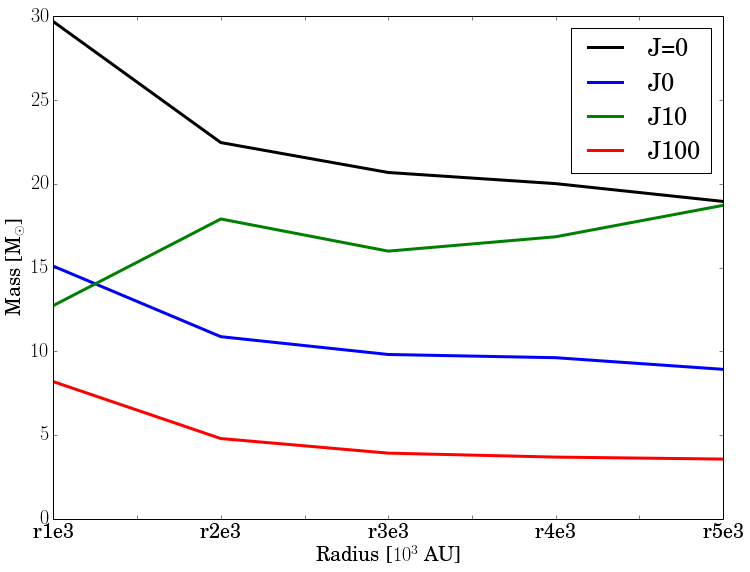

In [12]:
ax = mdata.plot(grid=False, figsize=(12,9), lw=3)
ax.set_xlabel('Radius [$10^3$ AU]')
ax.set_ylabel('Mass [M$_{\odot}$]')

,J=0,J0,J10,J100
r1e3,4.117670e+10,3.898168e+10,5.515268e+10,5.211008e+10
r2e3,4.407345e+08,1.447556e+08,5.989479e+09,2.611060e+08
r3e3,1.286573e+08,4.220764e+07,2.420996e+08,6.574739e+07
r4e3,6.380776e+07,2.020982e+07,7.741801e+07,2.671471e+07
r5e3,3.789813e+07,1.137465e+07,6.168602e+07,1.509626e+07


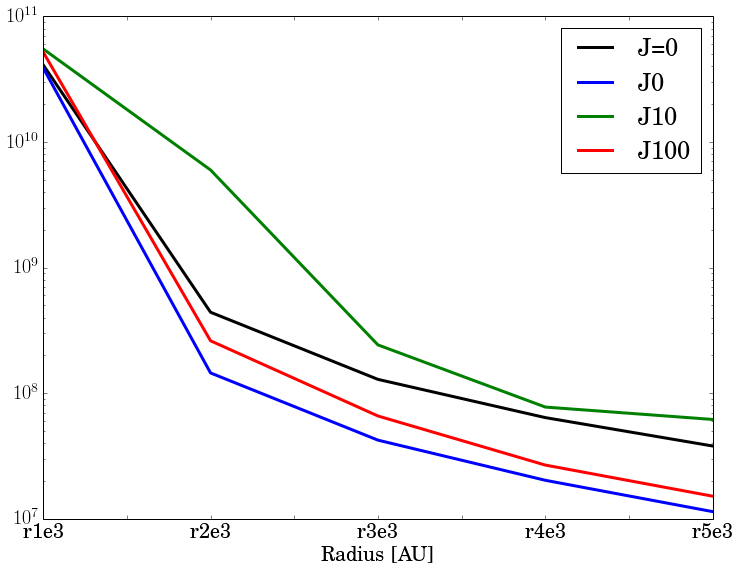

In [13]:
ax = ndata.plot(grid=False, logy=True, figsize=(12,9), lw=3)
ax.set_xlabel('Radius [AU]')
ndata

,J=0,J0,J10,J100
r1e3,670.597127,506.350314,326.588658,169.633158
r2e3,649.532633,464.116686,347.118667,116.162616
r3e3,591.878297,409.938889,322.054457,103.752999
r4e3,543.071310,355.549565,313.207304,100.246223
r5e3,510.498820,326.509535,285.199299,99.853805


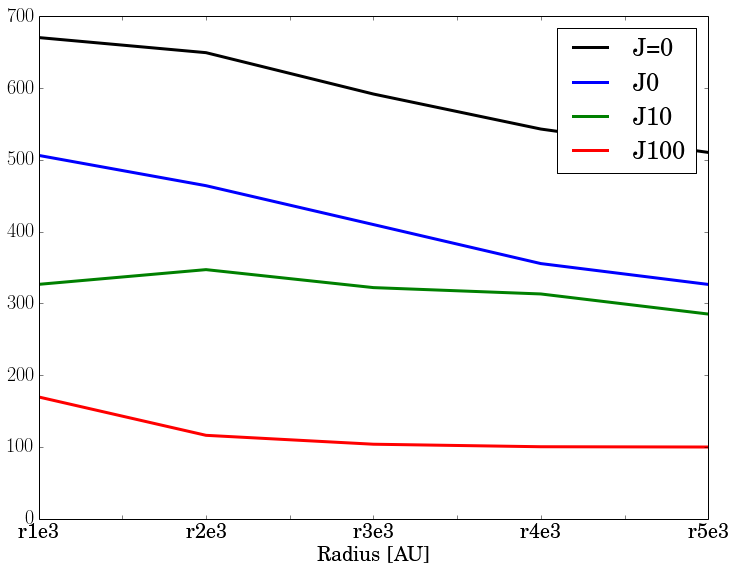

In [14]:
ax = Tdata.plot(grid=False, figsize=(12,9), lw=3)
ax.set_xlabel('Radius [AU]')
Tdata

## Density - Temperature phase diagram

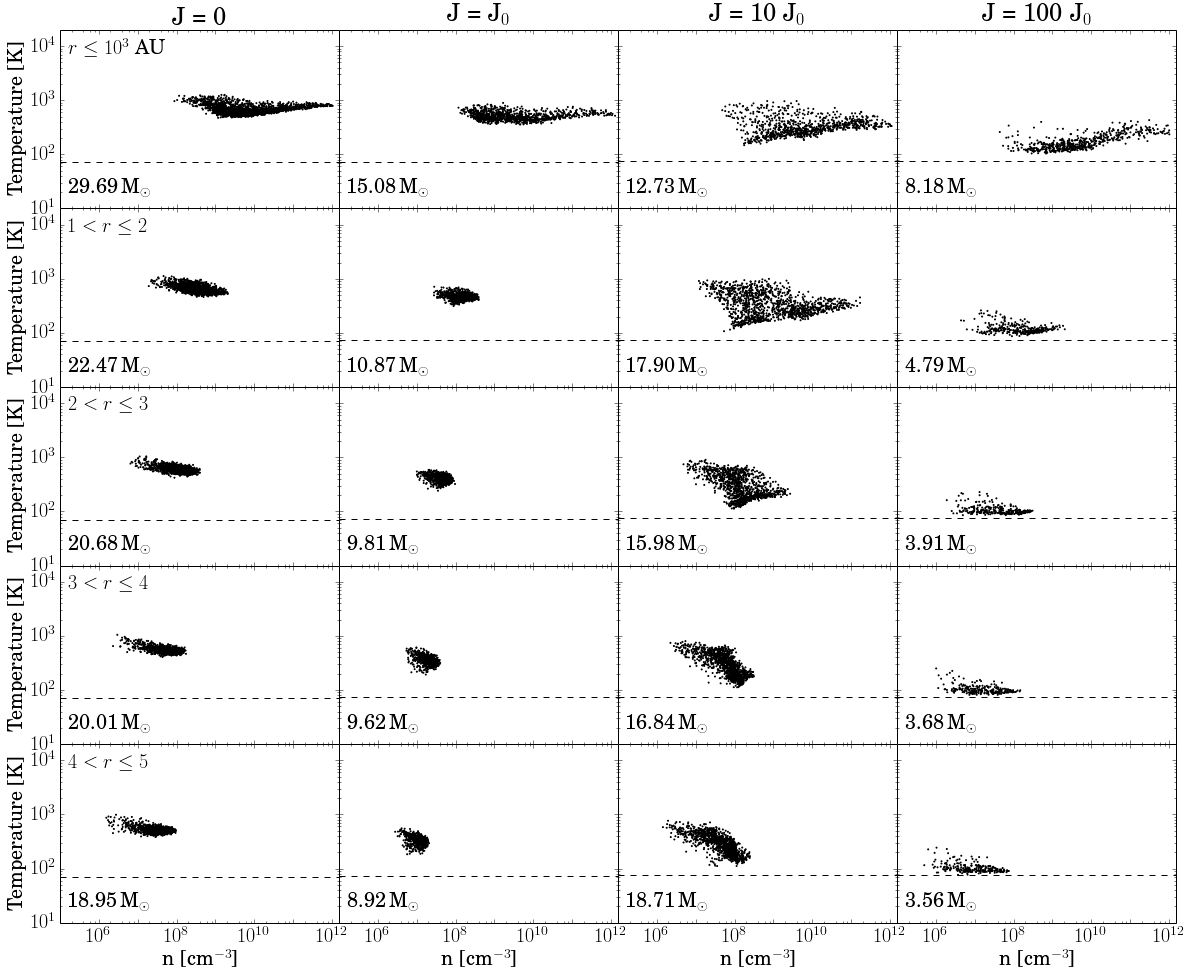

In [15]:
def plot_temp(ax, snap, selection, **kwargs):
    dens = snap.gas.get_number_density()
    temp = snap.gas.get_temperature()
    #ax.hexbin(dens[selection],temp[selection], gridsize=250, bins='log', xscale='log', yscale='log', mincnt=1)
    ax.scatter(dens[selection],temp[selection], **kwargs)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.axhline(2.725 * (snap.header.Redshift + 1),
               linestyle='--', color='k')
    return ax
    

fig, axarr = plt.subplots(5,4, sharex=True, sharey=True, figsize=(20,16))
for i,snap in enumerate(snaplist):
    for j, ml in enumerate(mls):
        axarr[j,i] = plot_temp(axarr[j,i], snap, rls[j][i], s=1, c='k')
        #axarr[j,i].plot(ndata.iat[j,i], Tdata.iat[j,i], 'ro', ms=8)
        axarr[j,i].text(.03,.05, '{:.2f}'.format(mdata.iat[j,i]) + r'$\,$M$_{\odot}$', 
                        ha='left', va='bottom', size=20, transform=axarr[j,i].transAxes)
        
axarr[0,0].set_xlim(1e5, 1.5e12)
axarr[0,0].set_ylim(10, 2e4)
for a in axarr[:, 0]:
    a.set_ylabel('Temperature [K]')
for a in axarr[-1, :]:
    a.set_xlabel('n [cm$^{-3}$]') 

plt.setp([a.get_xticklabels()[1::2] for a in axarr[-1, :]], visible=False)
fig.subplots_adjust(hspace=0, wspace=0)

axarr[0,0].set_title(r'J = 0')
axarr[0,1].set_title(r'J = J$_{0}$')
axarr[0,2].set_title(r'J = 10 J$_{0}$')
axarr[0,3].set_title(r'J = 100 J$_{0}$')

axarr[0,0].text(.03,.95, r'$r\leq 10^3$ AU', ha='left', va='top', size=20, transform=axarr[0,0].transAxes)
axarr[1,0].text(.03,.95, r'$1 < r \leq 2$', ha='left', va='top', size=20, transform=axarr[1,0].transAxes)
axarr[2,0].text(.03,.95, r'$2 < r \leq 3$', ha='left', va='top', size=20, transform=axarr[2,0].transAxes)
axarr[3,0].text(.03,.95, r'$3 < r \leq 4$', ha='left', va='top', size=20, transform=axarr[3,0].transAxes)
axarr[4,0].text(.03,.95, r'$4 < r \leq 5$', ha='left', va='top', size=20, transform=axarr[4,0].transAxes)

fig.savefig('figures/radial_bins/temp'+tag+'.png', bbox_inches='tight')

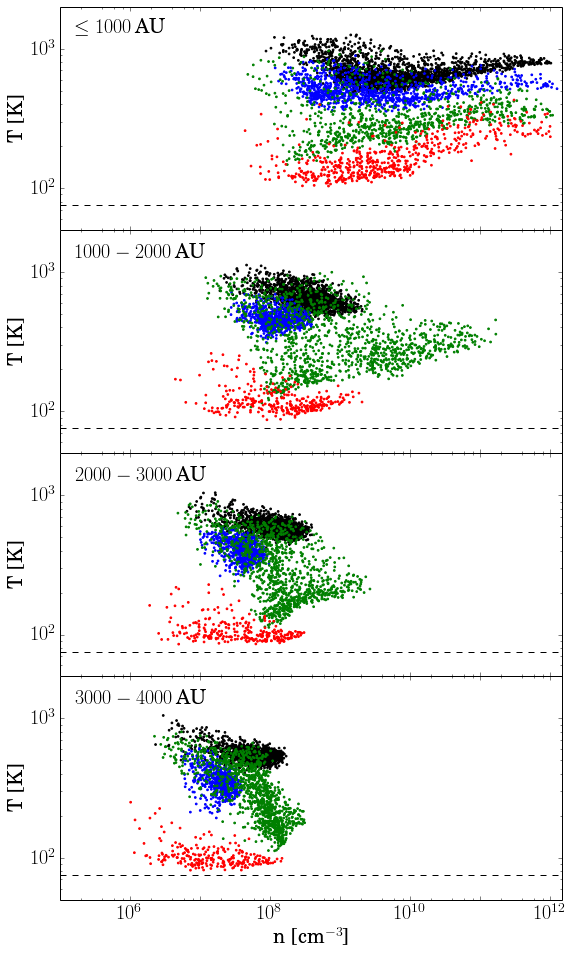

In [16]:
def plot_temp(ax, snap, selection, **kwargs):
    dens = snap.gas.get_number_density()
    temp = snap.gas.get_temperature()
    cmb = kwargs.pop('cmb', True)
    #ax.hexbin(dens[selection],temp[selection], gridsize=250, bins='log', xscale='log', yscale='log', mincnt=1)
    ax.scatter(dens[selection],temp[selection], **kwargs)
    ax.set_xscale('log')
    ax.set_yscale('log')
    if cmb:
        ax.axhline(2.725 * (snap.header.Redshift + 1),
                   linestyle='--', color='k')
    return ax
    
clist = ['k', 'b', 'g', 'r']
markCMB = [False, False, True, False]
fig, axarr = plt.subplots(4,1, sharex=True, sharey=True, figsize=(9,16))
for i,snap in enumerate(snaplist):
    for j in xrange(4):
        axarr[j] = plot_temp(axarr[j], snap, rls[j][i], cmb=markCMB[i], edgecolor=clist[i], s=3, c=clist[i])
        #axarr[j,i].plot(ndata.iat[j,i], Tdata.iat[j,i], 'ro', ms=8)
        #axarr[j].text(.03,.05, '{:.2f}'.format(mdata.iat[j,i]) + r'$\,$M$_{\odot}$', 
        #              ha='left', va='bottom', size=20, transform=axarr[j].transAxes)
        
axarr[0].set_xlim(1e5, 1.5e12)
axarr[0].set_ylim(50, 2e3)
for a in axarr[:]:
    a.set_ylabel('T [K]')
axarr[-1].set_xlabel('n [cm$^{-3}$]') 

plt.setp(axarr[-1].get_xticklabels()[1::2], visible=False)
fig.subplots_adjust(hspace=0, wspace=0)
'''
axarr[0,0].set_title(r'J = 0')
axarr[0,1].set_title(r'J = J$_{0}$')
axarr[0,2].set_title(r'J = 10 J$_{0}$')
axarr[0,3].set_title(r'J = 100 J$_{0}$')
'''
axarr[0].text(.03,.95, r'$\leq 1000\,$AU', ha='left', va='top', size=20, transform=axarr[0].transAxes)
axarr[1].text(.03,.95, r'$1000-2000\,$AU', ha='left', va='top', size=20, transform=axarr[1].transAxes)
axarr[2].text(.03,.95, r'$2000-3000\,$AU', ha='left', va='top', size=20, transform=axarr[2].transAxes)
axarr[3].text(.03,.95, r'$3000-4000\,$AU', ha='left', va='top', size=20, transform=axarr[3].transAxes)

fig.savefig('figures/radial_bins/temp-overlay'+tag+'.png', bbox_inches='tight')